#Using R in Julia
##Why use R in Julia?
Julia is a very fast and intuitive programming language, yet
1. it is still young
2. it is not yet the favourite programming language for statisticians.
Therefore, one might want, from time to time, to use an R function that performs a given test which is not yet implemented in Julia.


##How to use R in Julia
There are thus far, to my knowledge, two packages which can be used in Julia to call R:
- "Rif", which dates from 2012 and has not been updated since; it is obsolete and I don't recommend it;
- "RCall", which works quite nicely, and will be presented herein.

Author said: *"It is written entirely in Julia. There is absolutely no "glue" code written in a compiled language like C or C++. As I said, this may not mean much to you unless you have tried to do something like this, in which case it is astonishing."*

###RCall requirements and installation
RCall requires that a recent version of R, at least 3.2.0, be installed. Packages can be there already or can be installed later. 
In Juliabox, R is already installed. However, only the default libraries are installed, and it is, to my knowledge, not possible to install new libraries on Juliabox.
If R has been installed, it is possible to install RCall.jl from within Julia, using

In [18]:
Pkg.add("RCall")

INFO: Nothing to be done


If you have updated the R installation, you may need to rebuild RCall via

In [19]:
Pkg.build("RCall")

Start using RCall using

In [ ]:
using(RCall)

##Simple R expressions and R outputs: playing in R independently of Julia

###Basics: the rprint function 
Everything you run will be "added" as if you were running an R console. 

In [2]:
rprint("1+2")

[1] 3


In [4]:
rprint("a=rnorm(3)")

[1] 0.78097673 0.07217773 0.44840792


In [3]:
rprint("library(MASS)")

[1] "MASS"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [6]:
rprint("fit = lm(bwt ~ ., data = birthwt)")


Call:
lm(formula = bwt ~ ., data = birthwt)

Coefficients:
(Intercept)          low          age          lwt         race        smoke  
   3612.508    -1131.217       -6.245        1.051     -100.905     -174.116  
        ptl           ht           ui          ftv  
     81.340     -181.955     -336.776       -7.578  



In [7]:
rprint("fit")


Call:
lm(formula = bwt ~ ., data = birthwt)

Coefficients:
(Intercept)          low          age          lwt         race        smoke  
   3612.508    -1131.217       -6.245        1.051     -100.905     -174.116  
        ptl           ht           ui          ftv  
     81.340     -181.955     -336.776       -7.578  



the latter being equivalent to

In [8]:
rprint(:fit)


Call:
lm(formula = bwt ~ ., data = birthwt)

Coefficients:
(Intercept)          low          age          lwt         race        smoke  
   3612.508    -1131.217       -6.245        1.051     -100.905     -174.116  
        ptl           ht           ui          ftv  
     81.340     -181.955     -336.776       -7.578  



###Confusing syntax
Beware: one cannot use the $ sign as is, but should use \$ instead.

In [9]:
rprint("ls(fit)")
rprint("fit$fitted.values")

 [1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"      


LoadError: LoadError: RCall.jl Error: object 'fitStatsBase.fitted.values' not found

while loading In[9], in expression starting on line 2

In [10]:
rprint("fit\$fitted.values")

      85       86       87       88       89       91       92       93 
3146.460 3243.797 3315.309 2967.862 3000.703 3308.908 3490.591 3304.250 
      94       95       96       97       98       99      100      101 
3278.010 3293.819 3290.933 3341.136 3090.242 2964.248 3330.125 3330.125 
     102      103      104      105      106      107      108      109 
3419.971 3282.584 2974.175 3281.104 3221.901 3063.541 3491.402 3260.988 
     111      112      113      114      115      116      117      118 
2927.793 3512.174 3359.483 3472.913 3250.694 3415.661 3415.661 3355.909 
     119      120      121      123      124      125      126      127 
3218.871 3510.726 3385.882 3288.292 3348.645 3299.129 3354.593 3238.320 
     128      129      130      131      132      133      134      135 
3284.625 3576.340 3396.048 3548.538 2982.843 2982.843 3420.112 3329.803 
     136      137      138      139      140      141      142      143 
3467.371 3087.575 3310.738 3300.619 3336.660 3234.7

Also, " " (double quotes) and ' ' (single quotes) are synonyms in R, but not in Julia. Inside an rprint, use ' ' for character strings.

In [ ]:
rprint("a="ch"")

does not work, contrary to

In [ ]:
rprint("a='ch'")

###Libraries
Libraries can simply be added as if in R. It can't work in Juliabox though.
###Plots
Plots from R can also be drawn.

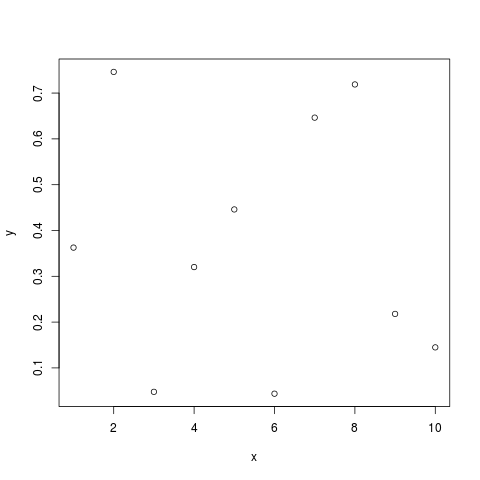

NULL


In [4]:
rprint("plot(1:10,runif(10), xlab='x', ylab='y')")

It also works for ggplot.

###The reval function
The function **reval** returns, on top of the raw R output, the type of R object that is returned.
R types (in Julia) are all of the forme Rcall.XXXSxp. Examples:
- Rcall.StrSxp: string vector
- Rcall.IntSxp: integer vector
- RCall.RealSxp: real vector
- RCall.NilSxp: R NULL value
- RCall.VecSxp: R list (i.e. Array{Any,1})

In [4]:
reval("fit = lm(bwt ~ ., data = birthwt)")

RCall.RObject{RCall.VecSxp}

Call:
lm(formula = bwt ~ ., data = birthwt)

Coefficients:
(Intercept)          low          age          lwt         race        smoke  
   3612.508    -1131.217       -6.245        1.051     -100.905     -174.116  
        ptl           ht           ui          ftv  
     81.340     -181.955     -336.776       -7.578  



##Converting Julia objects to R objects

To see what kind of object you will get from a Julia object, use RObject.



In [5]:
RObject(1)

RCall.RObject{RCall.IntSxp}
[1] 1


In [6]:
RObject([1,2,3])

RCall.RObject{RCall.IntSxp}
[1] 1 2 3


In [7]:
RObject(1:3)

RCall.RObject{RCall.IntSxp}
[1] 1 2 3


However, RObject does not assign the value to an R variable. For example

In [8]:
a = RObject([1,2,3])
rprint(:a)

LoadError: LoadError: RCall.jl Error: object 'a' not found

while loading In[8], in expression starting on line 2

Instead, one should use **@rput**, which copies a Julia variable (that can be of relatively "any" Julia type) to an R variable with the same name. The variable is then "run" in R.

In [10]:
a = [1,2,3]
@rput(a)

3-element Array{Int64,1}:
 1
 2
 3

In [11]:
rprint(:a)

[1] 1 2 3


##Converting R objects to Julia objects

In [12]:
rcopy("1")

1.0

In [13]:
rcopy("runif(3)")

3-element Array{Float64,1}:
 0.367911
 0.190173
 0.308766

In [14]:
rcopy(:a)

3-element Array{Int32,1}:
 1
 2
 3

In [15]:
rcopy("1:3")

3-element Array{Int32,1}:
 1
 2
 3

In [17]:
rcopy("c(1,2,3)")

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

One can force the (Julia) destination type:

In [19]:
rcopy(Array{Int64,1},"c(1,2,3)")

3-element Array{Int64,1}:
 1
 2
 3

But not every R type can be converted to a Julia type.

In [20]:
rcopy(:fit)

Dict{Symbol,Any} with 12 entries:
  symbol("fitted.values") => [3146.46,3243.8,3315.31,2967.86,3000.7,3308.91,349…
  :model                  => 189x10 DataFrames.DataFrame…
  :xlevels                => Dict{Symbol,Any}()
  :effects                => [-40481.4,-7846.86,-30.4752,546.067,-829.545,-1036…
  :assign                 => Int32[0,1,2,3,4,5,6,7,8,9]
  :coefficients           => [3612.5084754236923,-1131.2165220078946,-6.2454473…
  :rank                   => 10
  :residuals              => [-623.46,-692.797,-758.309,-373.862,-400.703,-686.…
  :qr                     => Dict{Symbol,Any}(:pivot=>Int32[1,2,3,4,5,6,7,8,9,1…
  :terms                  => Ptr{RCall.LangSxp} @0x00000000035c4e20
  symbol("df.residual")   => 179
  :call                   => Ptr{RCall.LangSxp} @0x0000000004ed2d20

We usually do not want the whole object but are interested in a few values, that can be extracted then converted. 


In [21]:
rcopy("fit\$fitted.values")

189-element Array{Float64,1}:
 3146.46
 3243.8 
 3315.31
 2967.86
 3000.7 
 3308.91
 3490.59
 3304.25
 3278.01
 3293.82
 3290.93
 3341.14
 3090.24
    ⋮   
 2203.43
 2259.53
 2284.22
 2069.79
 2141.24
 2243.49
 2104.47
 2116.05
 2181.04
 1959.57
 2140.53
 2007.0 

Similarly to @rput, there is an **@rget**, that allows to copy an R variable to Julia (with the same name).


In [22]:
reval("b = fit\$fitted.values")
@rget(b)

189-element Array{Float64,1}:
 3146.46
 3243.8 
 3315.31
 2967.86
 3000.7 
 3308.91
 3490.59
 3304.25
 3278.01
 3293.82
 3290.93
 3341.14
 3090.24
    ⋮   
 2203.43
 2259.53
 2284.22
 2069.79
 2141.24
 2243.49
 2104.47
 2116.05
 2181.04
 1959.57
 2140.53
 2007.0 

##Tip: creating small functions that take and return Julia arguments

One does not want to code entire parts of their Julia code in R. Therefore, it seems a good idea to create small functions that take and return Julia arguments and that call R in between. Consequently, the rest of the code is R-free.

In [11]:
function correlation(x::Array{Float64,1},y::Array{Float64,1},method)
    @rput(x,y,method)
    reval("res = cor.test(x,y,method=method)\$p.value")
    @rget(res)
end

correlation (generic function with 4 methods)

In [16]:
correlation([1.0,2.0,3.0],[1.0,2.0,3.0],"spearman")

0.3333333333333333

In [20]:
correlation(rand(10),rand(10),"pearson")

0.1627759086331455

##Other (potentially) interesting functions

**rcall(fun, args)** allows to call an R function, passing parameters that are Julia objects, and returning an R object. I don't particularly recommend it, for it is not clear how the Julia objects were converted and I would rather not mix Julia and R objects on a same command line. 

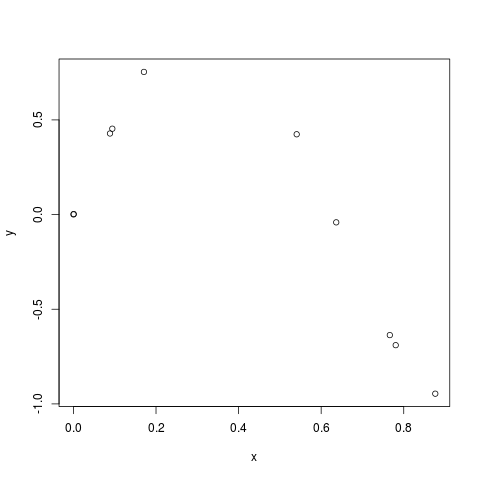

RCall.RObject{RCall.NilSxp}
NULL


In [24]:
X = rand(10)
rcall(:plot, X, sin(5*X), xlab="x", ylab="y")

##Resources
- all RCall functions and types: http://rcalljl.readthedocs.org/en/latest/api/RCall/
- some examples: http://www.r-bloggers.com/monthofjulia-day-25-interfacing-with-other-languages/, https://cloud.sagemath.com/projects/a6645bae-a4ce-4c6a-8a3a-0928abe239c8/files/2015-04-13-133603.html